In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import tweepy
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

## A quick investigation into twitter sentiment analysis

#### Need to have consumer key & secret from https://apps.twitter.com 

In [2]:
# read consumer keys from where I saved it
# avoids including key & secret in text here
with open('twitterkeys.txt') as f:
    consumerKey = f.readline().strip()
    consumerSecret = f.readline().strip()
    

In [3]:
# Create an authentication using the given key and secret
auth = tweepy.OAuthHandler(consumer_key=consumerKey, 
    consumer_secret=consumerSecret)

# Connect to the Twitter API using the authentication
api = tweepy.API(auth)


In [4]:
# Perform a basic search query for '#data' -- grabs 15 entries by default
result = api.search(q='%23data')

In [5]:
dir(result[0])  # to show the attributes of result[0]

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__getattribute__',
 '__getstate__',
 '__hash__',
 '__init__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_api',
 '_json',
 'author',
 'contributors',
 'coordinates',
 'created_at',
 'destroy',
 'entities',
 'favorite',
 'favorite_count',
 'favorited',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'metadata',
 'parse',
 'parse_list',
 'place',
 'possibly_sensitive',
 'retweet',
 'retweet_count',
 'retweeted',
 'retweets',
 'source',
 'source_url',
 'text',
 'truncated',
 'user']

In [7]:
tweet = result[0] #Get the first tweet in the result

# Let's look at the tweet payload for the attributes 
# excluding hidden attributes (those that don't start with "_")

for param in dir(tweet):
    if not param.startswith("_"):
        print "%s : %s\n" % (param, eval('tweet.'+param))


author : User(follow_request_sent=None, has_extended_profile=False, profile_use_background_image=False, _json={u'follow_request_sent': None, u'has_extended_profile': False, u'profile_use_background_image': False, u'default_profile_image': False, u'id': 754880124563038208, u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png', u'verified': False, u'profile_text_color': u'000000', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/754894062759530500/W7Q1c3Wm_normal.jpg', u'profile_sidebar_fill_color': u'000000', u'entities': {u'url': {u'urls': [{u'url': u'https://t.co/uUS9I1lUM4', u'indices': [0, 23], u'expanded_url': u'http://4unow.net/freegirts', u'display_url': u'4unow.net/freegirts'}]}, u'description': {u'urls': []}}, u'followers_count': 567, u'profile_sidebar_border_color': u'000000', u'id_str': u'754880124563038208', u'profile_background_color': u'000000', u'listed_count': 170, u'is_translation_enabled': False, u'utc_offset': -2

### Let's play with Sentiment Analysis. I'm going to pick something controversial. Let's try "#Trump2016"

In [27]:
# gather tweets about something controversial: #Trump2016
results = []

#Get the first 2000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23Trump').items(2000):
    results.append(tweet.text)

# Verify the number of items returned
print len(results)

2000


In [28]:
# Convert into a pandas dataframe & rename column
df = pd.DataFrame(results)
df = df.rename(columns={0: 'text'})

In [29]:
# Instantiate TextBlob on tweet text & record sentiment scores
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [30]:
df.head()

,text,polarity,subjectivity
0,Trump rips media for mocking Christians https:...,0.000000,0.000000
1,RT @RonSantoFan: Nothing more Presidential tha...,0.000000,0.666667
2,RT @bfraser747: 💥💥 #WakeUpAmerica\n\nWe cann...,-0.133333,0.533333
3,RT @the_other_kimk: When #Trump's hateful rhet...,0.000000,0.100000
4,Democrats wonder and worry: Why isn’t Clinton ...,0.100000,1.000000


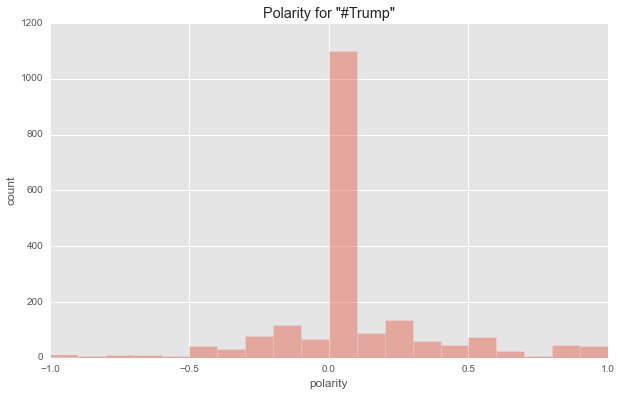

In [31]:
# Plot a histogram
f, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.distplot(df['polarity'], kde=False, bins=20)
# plt.ylim([0, 100])
plt.ylabel('count')
plt.title('Polarity for "#Trump"')


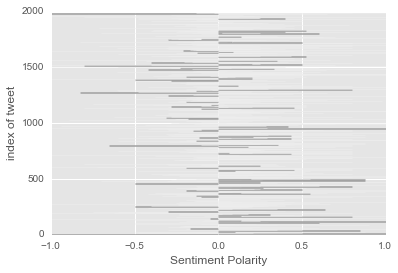

In [18]:
# looking at individual tweet polarities
plt.barh(xrange(0,2000), df['polarity'], color='k')
plt.xlabel('Sentiment Polarity')
plt.ylabel('index of tweet')

In [19]:
# bin & average data into low, middle, high polarities
high_polarity = df[df['polarity']>0.3]
mid_polarity = df[(df['polarity']<0.3) & (df['polarity']>-0.3)]
low_polarity = df[df['polarity']<-0.3]

In [20]:
# check counts
print len(low_polarity)
print len(mid_polarity)
print len(high_polarity)

111
1547
310


In [21]:
# Show the weighted mean polarities of the extremes
# Take average polarity and multiply by # of tweets in that polarity bucket
print np.mean(low_polarity['polarity'])*len(low_polarity)
print np.mean(high_polarity['polarity'])*len(high_polarity)

-63.2158224263
188.120305736


### Let's try something people feel pretty strongly about one way or another.
### Puppies: everyone likes them, right?


In [22]:
# gather tweets about something everyone likes: #puppy
results2 = []

#Get the first 2000 items based on the search query
for tweet in tweepy.Cursor(api.search, q='%23puppy').items(2000):
    results2.append(tweet.text)

(-1, 1)

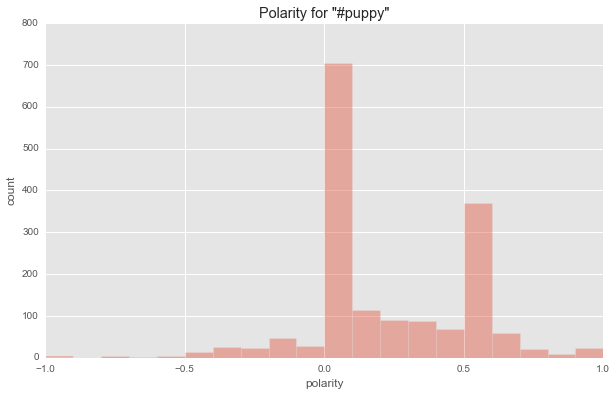

In [23]:
# Convert into a pandas dataframe & rename column
df2 = pd.DataFrame(results2)
df2 = df2.rename(columns={0: 'text'})
# Instantiate TextBlob on tweet text & record sentiment scores
df2['polarity'] = df2['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df2['subjectivity'] = df2['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
# Plot a histogram
f, axes = plt.subplots(1, 1, figsize=(10, 6))
sns.distplot(df2['polarity'], kde=False, bins = 20)
# plt.ylim([0, 100])
plt.ylabel('count')
plt.title('Polarity for "#puppy"')
plt.xlim([-1, 1])

### Again, most of the tweets are near 0 polarity. But, the distribution is skewed distinctly to the positive side, indicating that yes, more people like puppies than dislike them.

In [24]:
# bin & average data into low, middle, high polarities
high_polarity = df2[df2['polarity']>0.3]
mid_polarity = df2[(df2['polarity']<0.3) & (df2['polarity']>-0.3)]
low_polarity = df2[df2['polarity']<-0.3]
# # check counts
# print len(low_polarity)
# print len(mid_polarity)
# print len(high_polarity)
# Show the mean polarities of the extremes
print("The weighted mean low polarity is: {0}".format(np.mean(low_polarity['polarity'])*len(low_polarity)))
print("The weighted mean high polarity is: {0}".format(np.mean(high_polarity['polarity'])*len(high_polarity)))

The weighted mean low polarity is: -24.3401041667
The weighted mean high polarity is: 323.844950284


In [33]:
df2.max()

text            😎😎😎😎😂😂😂😂😂😂😂 #sleep #mylove #cucciol...
polarity                                                        1
subjectivity                                                    1
dtype: object

### Yes, most people do indeed like puppies. 